In [1]:
# import necessary basic libraries
import os
import sys
import shutil
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt 

In [22]:
path = 'data/Glioma/209.png'
img = cv2.imread(path)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
#move all masks to another directory
source_1 = 'data/Glioma/'
dest_1 = 'data/Glioma_masks/'
source_2 = 'data/Meningioma/'
dest_2 = 'data/Meningioma_masks/'
source_3 = 'data/Pituitary tumor/'
dest_3 = 'data/Pituitary_masks/'

In [24]:
masks_1 = [f for f in os.listdir(source_1) if f.endswith('_mask.png')]
'''for file in masks_1:
    source = os.path.join(source_1, file)
    dest = os.path.join(dest_1, file)
    shutil.move(source, dest)'''
print('Glioma masks moved....\n')

masks_2 = [f for f in os.listdir(source_2) if f.endswith('_mask.png')]
'''for file in masks_2:
    source = os.path.join(source_2, file)
    dest = os.path.join(dest_2, file)
    shutil.move(source, dest)'''
print('Meningioma masks moved....\n')

masks_3 = [f for f in os.listdir(source_3) if f.endswith('_mask.png')]
'''for file in masks_3:
    source = os.path.join(source_3, file)
    dest = os.path.join(dest_3, file)
    shutil.move(source, dest)'''
print('Pituitary masks moved....\n')

Glioma masks moved....

Meningioma masks moved....

Pituitary masks moved....



Text(0.5, 1.0, 'Pituitary tumor')

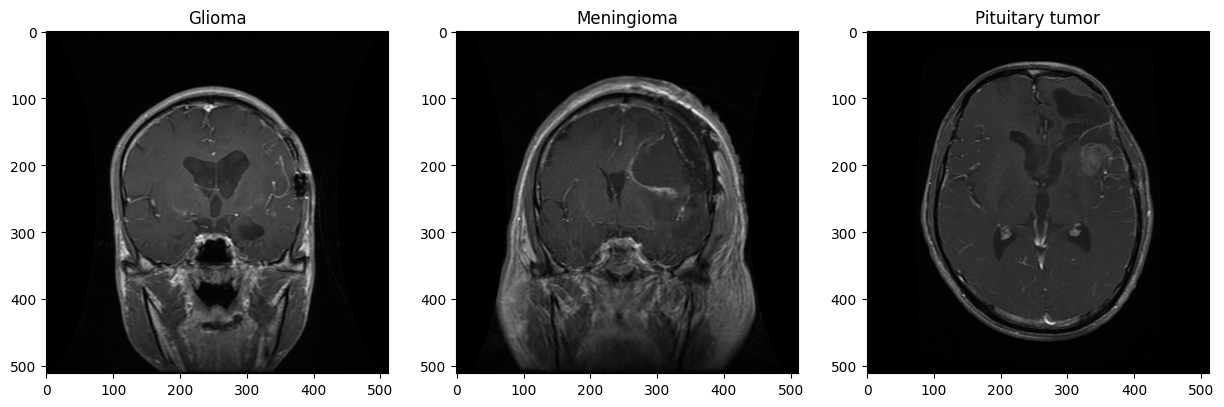

In [3]:
## Display images from the dataset on subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
img1 = cv2.imread('data/Glioma/209.png')
axes[0].imshow(img1)
axes[0].set_title('Glioma')
img2 = cv2.imread('data/Meningioma/1.png')
axes[1].imshow(img2)
axes[1].set_title('Meningioma')
img3 = cv2.imread('data/Pituitary tumor/59.png')
axes[2].imshow(img3)
axes[2].set_title('Pituitary tumor')

In [3]:
#get points from mask and mark them on images
# example_path = 'data/Glioma/209.png' 
# example_mask_path = 'data/Glioma_masks/209_mask.png'
# img = cv2.imread(example_path)
# mask_img = cv2.imread(example_mask_path)
# points = np.column_stack(np.where(mask_img[:, :, :] == 255))
def mark_masks(source, destination):
    for j in range(len(os.listdir(source))):
        img = cv2.imread(source + os.listdir(source)[j])
        mask_img = cv2.imread(destination + os.listdir(destination)[j])
        points = np.column_stack(np.where(mask_img[:, :, :] == 255))
        for point in points:
            cv2.circle(img, (point[1], point[0]), radius=1, color=(255, 255, 255), thickness=-1)
        marked_image_path = './' + os.listdir(source)[j]
        #cv2.imwrite(marked_image_path, img)
        resize_image(img, marked_image_path)


def resize_image(img, marked_image_path):
    original_height, original_width = img.shape[:2]
    new_width = original_width // 4
    new_height = original_height // 4     ##2
    resized_image = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)
    cv2.imwrite(marked_image_path, resized_image)

#image_path = './data/TRAIN/Glioma/'

#for j in range(len(os.listdir(image_path))):
    
    image = cv2.imread(image_path + os.listdir(image_path)[j])
    
    original_height, original_width = image.shape[:2]

    new_width = original_width // 4
    new_height = original_height // 4     ##2
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    cv2.imwrite(image_path + os.listdir(image_path)[j], resized_image)

In [4]:
mark_masks('./data/Meningioma/', './data/Meningioma_masks/')

In [5]:
mark_masks('./data/Pituitary tumor/', './data/Pituitary_masks/')

In [10]:
## Start assembling single encoder and decoder blocks
import numpy as np
import tensorflow as tf
import random

In [ ]:
#! pip install tensorflow

In [11]:
## Set weights seed to default: 42
random.seed(42)
## NUMPY PRE-REQUISITE TO TF
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
hidden_size = 100

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [8]:
train_1 = 'data/TRAIN/Glioma/*.png'
test_1 = 'data/TEST/Glioma/*.png'
##change to float type
def load_and_convert_images(image_paths):
    images = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            image = image.astype(np.float32) / 255.0
            image = image.reshape((len(image), np.prod(image.shape[1:])))
            images.append(image)
    return np.array(images)

In [9]:
import glob 

train_path_1 = glob.glob(test_1)
train_images_1 = load_and_convert_images(train_path_1)

In [11]:
train_images_1[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
test_2 = 'data/TEST/Meningioma/*.png'
train_path_2 = glob.glob(test_2)
train_images_2 = load_and_convert_images(train_path_2)

In [11]:
test_3 = 'data/TEST/Pituitary tumor/*.png'
train_path_3 = glob.glob(test_3)
train_images_3 = load_and_convert_images(train_path_3)

In [12]:
joined_input = np.concatenate((train_images_1, train_images_2, train_images_3))

In [13]:
joined_input[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
from tensorflow.keras.regularizers import l2

In [37]:
#joined_input = np.expand_dims(joined_input, axis=-1)

In [15]:
midpoint_x = joined_input.shape[0] // 2
midpoint_y = joined_input.shape[1] // 2
midpoint_z = joined_input.shape[2] // 2

truncated_input = joined_input[:midpoint_x, :midpoint_y, :midpoint_z]
reshaped_input = truncated_input.reshape(truncated_input.shape[0], -1)

In [16]:
#flatten image
flattened_input = joined_input.reshape(joined_input.shape[0], -1)
flattened_input[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
input_dim = flattened_input.shape[1] #reshaped_input.shape[1]
hidden_size = 100 ##double check

In [16]:
input_layer = Input(shape=(input_dim,))
encoder = Dense(hidden_size, activation='relu', 
                activity_regularizer=tf.keras.regularizers.l1(4e-4),
                kernel_regularizer=l2(0.004))(input_layer)
#encoded_shape = tf.keras.backend.int_shape(encoder)[1:]  # (height, width, channels)
#reshaped = Reshape((encoded_shape[0], encoded_shape[1], encoded_shape[2]))(encoded_shape)

In [17]:
encoder[0]  ##first encoder layer

<KerasTensor shape=(100,), dtype=float32, sparse=False, name=keras_tensor_2>

In [18]:
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
##TRAIN
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,915,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 49152)          │     4,964,352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,879,652 (37.69 MB)

 Trainable params: 9,879,652 (37.69 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [21]:
autoencoder.fit(flattened_input, flattened_input,  # Autoencoder targets are the inputs
                epochs=400,
                batch_size=256,
                shuffle=True,
                callbacks=[early_stopping])


Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - loss: 2.5338
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - loss: 1.5315
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - loss: 1.5682
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 924ms/step - loss: 1.5927
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 876ms/step - loss: 1.6045
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 941ms/step - loss: 1.6049
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 835ms/step - loss: 1.5930
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 916ms/step - loss: 1.5779
Epoch 9/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 858ms/step - loss: 1.5505
Epoch 10/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 1.5264   
Epoch 11/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 1.4964
Epoch 12/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 931ms/step - loss: 1.4685
Epoch 13/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 918ms/step - loss: 1.4405
Epoch 14/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 866ms/step - loss: 1.4129
Epoch 15/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 902ms/step - loss: 1.3859
Epoch 16/400

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


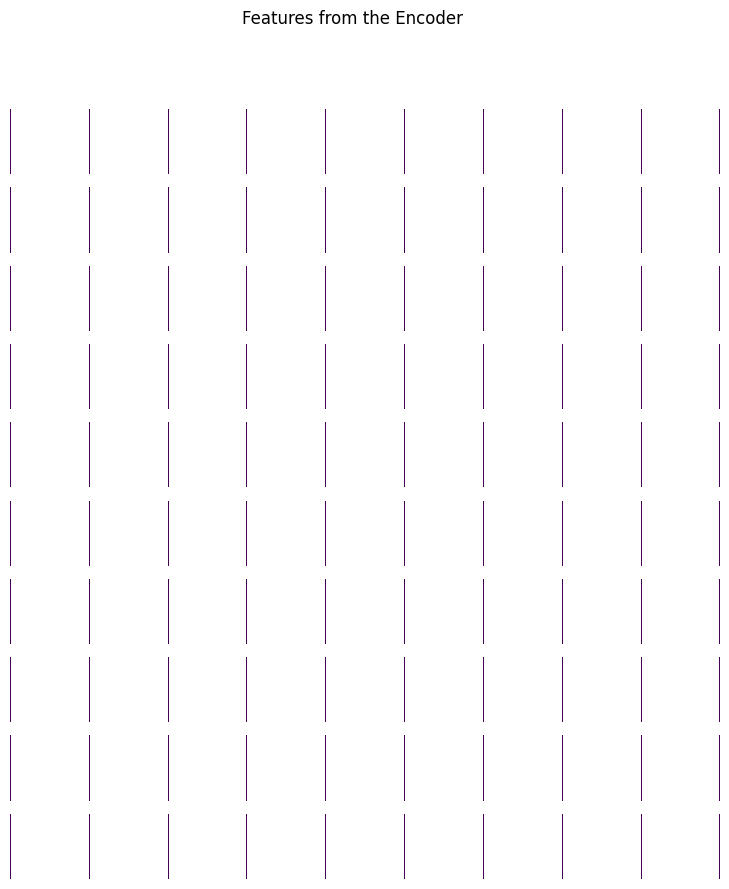

In [36]:
##VIEW THIS SAMPLE AUTOENCODER WITHOUT 3X3 CONV LAYERS AND LRN ALEXNET
encoder_model = Model(inputs=input_layer, outputs=encoder)
features = encoder_model.predict(flattened_input)

plt.figure(figsize=(10, 10))
for i in range(min(features.shape[1], 100)):#plot first 100 out of 4129 features as given in the summary
    plt.subplot(10, 10, i + 1)
    plt.imshow(features[:, i].reshape((613, 1)), cmap='viridis') 
    plt.axis('off')
plt.suptitle('Features from the Encoder')
plt.show()

## Try LRN AlexNet, upscale and softmax layers

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout, Reshape, Lambda
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
print(joined_input.shape)
print(truncated_input.shape)
print(reshaped_input.shape)
print(flattened_input.shape)

(613, 128, 384)
(306, 64, 192)
(306, 12288)
(613, 49152)


In [65]:
del reshaped_input, truncated_input

In [15]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [14]:
##get train and test datasets
'''train_dataset = 'data/TRAIN'
datagen = ImageDataGenerator()
train_data = datagen.flow_from_directory(
    train_dataset,
    batch_size=128,
    class_mode='sparse'
)'''

class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Load image paths and labels
        for class_idx, class_name in enumerate(os.listdir(root_dir)):
            class_dir = os.path.join(root_dir, class_name)
            if os.path.isdir(class_dir):
                for img_name in os.listdir(class_dir):
                    img_path = os.path.join(class_dir, img_name)
                    self.image_paths.append(img_path)
                    self.labels.append(class_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Example usage
train_dataset = 'data/TRAIN'
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = CustomImageDataset(root_dir=train_dataset, transform=transform)

In [90]:
'''class_indices = train_data.class_indices
print("Class Indices:", class_indices)

labels = train_data.classes
print("Labels:", labels)'''

Class Indices: {'Glioma': 0, 'Meningioma': 1, 'Pituitary tumor': 2}
Labels: [0 0 0 ... 2 2 2]


In [32]:
# Create the DataLoader
batch_size = 256
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate through the DataLoader
for batch_data, batch_labels in data_loader:
    print("Batch data shape:", batch_data.shape)
    print("Batch labels shape:", batch_labels.shape)

Batch data shape: torch.Size([256, 3, 256, 256])
Batch labels shape: torch.Size([256])
Batch data shape: torch.Size([256, 3, 256, 256])
Batch labels shape: torch.Size([256])
Batch data shape: torch.Size([256, 3, 256, 256])
Batch labels shape: torch.Size([256])
Batch data shape: torch.Size([256, 3, 256, 256])
Batch labels shape: torch.Size([256])
Batch data shape: torch.Size([256, 3, 256, 256])
Batch labels shape: torch.Size([256])
Batch data shape: torch.Size([256, 3, 256, 256])
Batch labels shape: torch.Size([256])
Batch data shape: torch.Size([256, 3, 256, 256])
Batch labels shape: torch.Size([256])
Batch data shape: torch.Size([256, 3, 256, 256])
Batch labels shape: torch.Size([256])
Batch data shape: torch.Size([256, 3, 256, 256])
Batch labels shape: torch.Size([256])
Batch data shape: torch.Size([27, 3, 256, 256])
Batch labels shape: torch.Size([27])


In [16]:
##feature functions
def plot_features(features, title, num_features=100):
    plt.figure(figsize=(10, 10))
    for i in range(num_features):
        plt.subplot(10, 10, i + 1)
        plt.imshow(features[:, i].reshape((features.shape[0], 1)), cmap='viridis')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

def plot_two_features(features, feature_idx1, feature_idx2, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(features[:, feature_idx1], features[:, feature_idx2], alpha=0.5)
    plt.xlabel(f'Feature {feature_idx1}')
    plt.ylabel(f'Feature {feature_idx2}')
    plt.title(title)
    plt.show()

def plot_all_features(features, title):
    num_features = features.shape[1]
    grid_size = int(np.ceil(np.sqrt(num_features)))
    
    plt.figure(figsize=(8, 8))
    for i in range(num_features):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(features[:, i].reshape((features.shape[0], 1)), aspect='auto', cmap='viridis')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

## plot input layer samples
'''def plot_input_samples(data, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(data[i])
        plt.title(f"Sample {i+1}")
        plt.axis('off')
    plt.show()'''


##local response normalization
def lrn(x):
    return tf.nn.local_response_normalization(x)

In [36]:
dataset[0]  ##true

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

In [109]:
#train_data.image_shape   ##example input shape TUPLE

(256, 256, 3)

In [83]:
#type(train_data)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [86]:
train_flat_size = 256 * 256 * 3

In [93]:
#train_data[0]  ##true

In [59]:
###update input layer to get min_ndim = 4
##modelling first autoencoder
input_dim = (256, 256, 3)   ## 256, 256 , 3   ##ignore 3 as it is num of channels
input_layer = Input(shape=(input_dim))
input_layer

<KerasTensor shape=(None, 256, 256, 3), dtype=float32, sparse=False, name=keras_tensor_18>

In [128]:
#del train_data, train_dataset  ##redo here if you run out of memory

In [42]:
##first layer autoencoder
##encoder just changes high dimensional input to low dimensional hidden layer
##use params of first layer #1 in COVID paper
hidden_dim = 5
#x1_flattened = tf.keras.layers.Flatten()(input_dim)
x1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x1 = Flatten()(x1)
encoder_1 = Dense(hidden_dim, activation='relu')(x1)

In [49]:
print("Input layer:", batch_data.shape)
print("Encoded layer:", encoder_1.shape)  ##Encoder lowers dimension

Input layer: torch.Size([27, 3, 256, 256])
Encoded layer: (None, 5)


In [53]:
##decoder brings back dimensions to high dimensional
y1 = Dense(256 * 256 * 3, activation='relu')(encoder_1)
y1 = Reshape((256, 256, 3))(y1)
y1 = Conv2D(16, (3, 3), activation='relu', padding='same')(y1)
decoder_1 = Conv2D(3, (3, 3), activation='relu', padding='same')(y1)

In [54]:
print("Input layer:", batch_data.shape)
print("Encoded layer:", encoder_1.shape)
print("Decoded layer:", decoder_1.shape)  ##Decoder brings back dimensions

Input layer: torch.Size([27, 3, 256, 256])
Encoded layer: (None, 5)
Decoded layer: (None, 256, 256, 3)


In [57]:
##fit first autoencoder to get h1
autoencoder1 = Model(input_layer, decoder_1)
autoencoder1.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='loss', patience=10)
for batch_data, batch_labels in data_loader:
    autoencoder1.fit(batch_data,  # Autoencoder inputs # Autoencoder targets are the same as inputs
                    epochs=500,    
                    batch_size=256,
                    shuffle=True,
                    callbacks=[early_stopping])  ##early stopping only on 400 epochs

Epoch 1/500


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(256, 3, 256, 256)

### ______ISSUE WITH PYDATASET OBJECT **KWARGS______
### ______ISSUE TO USE PYTORCH W/O EARLY STOPPING BECAUSE OF BAD DIMS______

# Try ViT Dataset, Brain Tumours

In [1]:
##hugging face dataset
from transformers import ViTImageProcessor, ViTModel
from PIL import Image
import requests

e:\VSprojects\Brain_Tumour_Autoencoder\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]


In [17]:
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image.show()   ###true

In [2]:
from datasets import load_dataset
from huggingface_hub import list_datasets

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import os
import cv2
import random

In [47]:
brain_tumours = load_dataset('Simezu/brain-tumour-MRI-scan')
brain_tumours.save_to_disk('data/HuggingFace')
brain_tumours.shape

Saving the dataset (1/1 shards): 100%|██████████| 1311/1311 [00:10<00:00, 120.94 examples/s]


{'train': (5712, 2), 'test': (1311, 2)}

In [48]:
type(brain_tumours)

datasets.dataset_dict.DatasetDict

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
brain_tumours['train'][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x350>,
 'label': 0}

In [13]:
test_image = brain_tumours['train'][0]['image']
test_image.show() ##img shown by PIL as .jpg

In [28]:
print(list(set(brain_tumours['train']['label'])))

[0, 1, 2, 3]


In [50]:
features = brain_tumours['train'].features
print(features['label'])

ClassLabel(names=['1-notumor', '2-glioma', '3-meningioma', '4-pituitary'], id=None)


In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), ##resize 
    transforms.ToTensor() ##transform to tensor
])
train_dataset = ImageFolder(root='./data/brain-tumour-MRI-scan/Training', transform=transform)
loaded_train = DataLoader(train_dataset, batch_size=128, shuffle=True) 
##set batch size to 128 as in COVID paper

In [11]:
test_dataset = ImageFolder(root='./data/brain-tumour-MRI-scan/Testing', transform=transform)
loaded_test = DataLoader(test_dataset, batch_size=128, shuffle=False)
class_names = test_dataset.classes

print(class_names)
print(len(train_dataset),len(test_dataset))

['1-notumor', '2-glioma', '3-meningioma', '4-pituitary']
5712 1311


In [74]:
#train_dataset[0]  ##true tensors

Text(0.5, 1.0, 'No tumor')

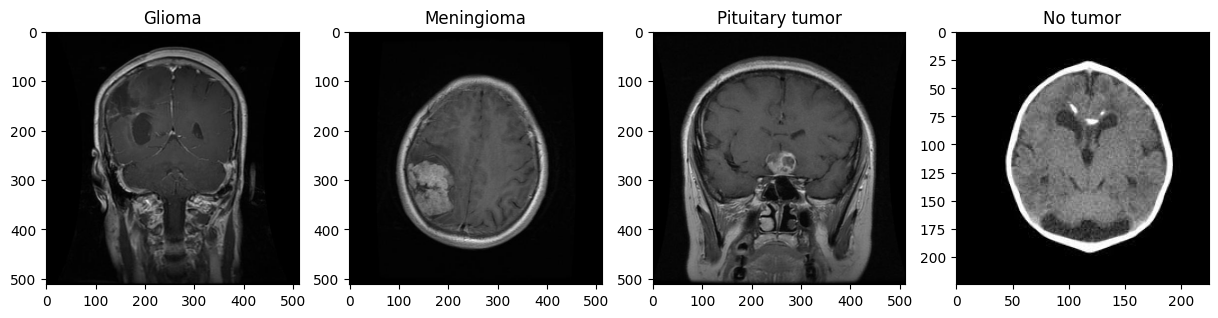

In [7]:
## Display images from the dataset on subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes = axes.flatten()
img1 = cv2.imread('data/brain-tumour-MRI-scan/Training/2-glioma/Tr-gl_0010.jpg')
axes[0].imshow(img1)
axes[0].set_title('Glioma')
img2 = cv2.imread('data/brain-tumour-MRI-scan/Training/3-meningioma/Tr-me_0010.jpg')
axes[1].imshow(img2)
axes[1].set_title('Meningioma')
img3 = cv2.imread('data/brain-tumour-MRI-scan/Training/4-pituitary/Tr-pi_0010.jpg')
axes[2].imshow(img3)
axes[2].set_title('Pituitary tumor')
img4 = cv2.imread('data/brain-tumour-MRI-scan/Training/1-notumor/Tr-no_0010.jpg')
axes[3].imshow(img4)
axes[3].set_title('No tumor')

In [8]:
##construct the Autoencoder object architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(8, 4, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 8, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [9]:
autoencoder = Autoencoder().to(device)

# Definition of loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

In [10]:
for epoch in range(10):  ##training 10 epochs due to response issues and time limit issues
    running_loss = 0.0
    for data in loaded_train:
        img, _ = data
        img = Variable(img).to(device)
        optimizer.zero_grad()
        outputs = autoencoder(img)
        loss = criterion(outputs, img)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print('Epoch [%d], Loss: %.4f' % (epoch+1, running_loss/len(train_dataset)))

Epoch [1], Loss: 0.0006
Epoch [2], Loss: 0.0006
Epoch [3], Loss: 0.0006
Epoch [4], Loss: 0.0006
Epoch [5], Loss: 0.0006
Epoch [6], Loss: 0.0006
Epoch [7], Loss: 0.0006
Epoch [8], Loss: 0.0006
Epoch [9], Loss: 0.0006
Epoch [10], Loss: 0.0006


In [12]:
from sklearn.metrics import classification_report
autoencoder.eval()
for criteria in [0.001,0.003,0.01,0.03,0.1]:
    y_pred=[]
    y_true=[]  
    test_loss = 0.0
    with torch.no_grad():
        for data in loaded_test:
            img, label = data
            img = Variable(img).to(device)
            outputs = autoencoder(img)
            loss = criterion(outputs, img)
            test_loss += loss.item()
            for i in range(len(img)):
                lossi=criterion(outputs[i], img[i])
                y_pred+=[int(lossi.item()>criteria)] #ture(big loss)=1,false(smsll loss)=0
                y_true+=[int(label[i]>0)] #ture(not notmal)=1,false(normal)=0
    print('test_loss',test_loss)
    print('criteria: lossi.item()>',criteria)
    print(classification_report(y_true, y_pred, target_names=['Normal','Abnormal'], digits=4)) 

test_loss 0.8856076523661613
criteria: lossi.item()> 0.001


e:\VSprojects\Brain_Tumour_Autoencoder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSprojects\Brain_Tumour_Autoencoder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSprojects\Brain_Tumour_Autoencoder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

      Normal     0.0000    0.0000    0.0000       405
    Abnormal     0.6911    1.0000    0.8173       906

    accuracy                         0.6911      1311
   macro avg     0.3455    0.5000    0.4087      1311
weighted avg     0.4776    0.6911    0.5648      1311

test_loss 0.8856076523661613
criteria: lossi.item()> 0.003
              precision    recall  f1-score   support

      Normal     0.0000    0.0000    0.0000       405
    Abnormal     0.6911    1.0000    0.8173       906

    accuracy                         0.6911      1311
   macro avg     0.3455    0.5000    0.4087      1311
weighted avg     0.4776    0.6911    0.5648      1311



e:\VSprojects\Brain_Tumour_Autoencoder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSprojects\Brain_Tumour_Autoencoder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSprojects\Brain_Tumour_Autoencoder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

test_loss 0.8856076523661613
criteria: lossi.item()> 0.01
              precision    recall  f1-score   support

      Normal     0.0000    0.0000    0.0000       405
    Abnormal     0.6911    1.0000    0.8173       906

    accuracy                         0.6911      1311
   macro avg     0.3455    0.5000    0.4087      1311
weighted avg     0.4776    0.6911    0.5648      1311



e:\VSprojects\Brain_Tumour_Autoencoder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSprojects\Brain_Tumour_Autoencoder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSprojects\Brain_Tumour_Autoencoder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

test_loss 0.8856076523661613
criteria: lossi.item()> 0.03
              precision    recall  f1-score   support

      Normal     0.1299    0.0247    0.0415       405
    Abnormal     0.6799    0.9260    0.7841       906

    accuracy                         0.6476      1311
   macro avg     0.4049    0.4754    0.4128      1311
weighted avg     0.5100    0.6476    0.5547      1311

test_loss 0.8856076523661613
criteria: lossi.item()> 0.1
              precision    recall  f1-score   support

      Normal     0.2051    0.5160    0.2935       405
    Abnormal     0.3288    0.1060    0.1603       906

    accuracy                         0.2326      1311
   macro avg     0.2669    0.3110    0.2269      1311
weighted avg     0.2906    0.2326    0.2014      1311



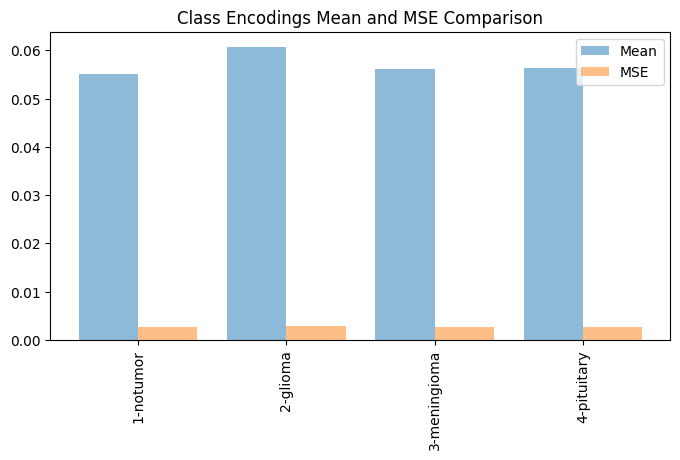

In [13]:
autoencoder.eval()
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
class_encodings = [[] for i in range(4)]
with torch.no_grad():
    for data in test_loader:
        img, label = data
        img = Variable(img).to(device)
        encoding = autoencoder.encoder(img)
        class_encodings[label.item()].append(encoding.cpu().numpy().ravel())

class_means = []
class_mses = []
for i in range(4):
    class_means.append(np.mean(class_encodings[i]))
    class_mse = np.mean((class_encodings[i] - class_means[i])**2)
    class_mses.append(class_mse)

plt.figure(figsize=(8,4))
plt.bar(np.arange(4)-0.2, class_means, width=0.4, label='Mean', alpha=0.5)
plt.bar(np.arange(4)+0.2, class_mses, width=0.4, label='MSE', alpha=0.5)
plt.xticks(range(4), class_names, rotation=90)
plt.legend()
plt.title("Class Encodings Mean and MSE Comparison")
plt.show()